<a href="https://colab.research.google.com/github/ymuto0302/base2_2020/blob/master/stock_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 経済データの分析：株価の移動平均／パフォーマンス評価
夏休み明けの一発目ですから，今回は軽い内容で授業を進めます (^^)

## pandas data reader のインストール
日経平均株価，米国株や日本株の株価を取得するために用いる。

（メモ) Google Colab には最初から入っていた！ 少し warning が出るけれど，十分使える。

Anaconda で演習に取り組んでいる場合，下記のとおり，pip コマンドを用いて panda-datareader をインストールすること

In [ ]:
!pip install pandas_datareader

     |████████████████████████████████| 112kB 2.1MB/s eta 0:00:01


## (イントロ) GAFA の株価
GAFA : Google, Apple, Facebook, Amazon

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


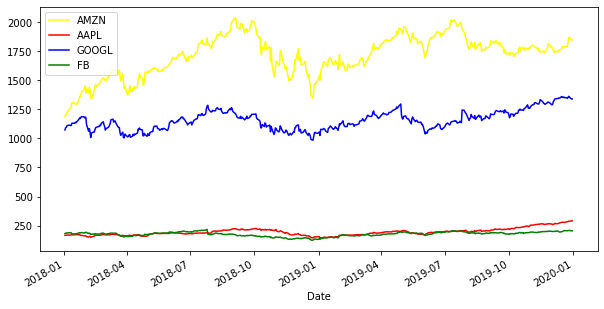

In [1]:
from pandas_datareader import data
from datetime import datetime
import matplotlib.pyplot as plt

start = datetime(2018, 1, 1)
end = datetime(2019, 12, 31)

df_AMZN = data.DataReader('AMZN', 'yahoo', start, end) # Amazon
df_AAPL = data.DataReader('AAPL', 'yahoo', start, end) # Apple
df_GOOGL = data.DataReader('GOOGL', 'yahoo', start, end) # Google
df_FB = data.DataReader('FB', 'yahoo', start, end) # Facebook

df_AMZN['Adj Close'].plot(figsize=(10, 5), color='yellow', label='AMZN')
df_AAPL['Adj Close'].plot(figsize=(10, 5), color='red', label='AAPL')
df_GOOGL['Adj Close'].plot(figsize=(10, 5), color='blue', label='GOOGL')
df_FB['Adj Close'].plot(figsize=(10, 5), color='green', label='FB')
plt.legend()

## pandas-datareader って何ですか？
pandas-datareader とは，Web上の様々なデータソースにアクセスし，株価・為替レート・人口・GDPなどのデータを Pandas のデータフレームとして取得するライブラリである。

pandas-datareader の公式サイト：

https://pandas-datareader.readthedocs.io/en/latest/

という訳で，Amazon の株価を取得する過程を見てみよう。

In [2]:
from pandas_datareader import data

start = datetime(2018, 1, 1)
end = datetime(2019, 12, 31)

# DataReader の書式：DataReader(ティッカー, データソース, データ取得開始日, データ取得終了日)
# ここで 'AMZN' は Amazon の ticker，データソースは Yahoo! Finance (米国)である。
df_AMZN = data.DataReader('AMZN', 'yahoo', start, end) # Amazon

In [3]:
df_AMZN

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,1190.000000,1170.510010,1172.000000,1189.010010,2694500,1189.010010
2018-01-03,1205.489990,1188.300049,1188.300049,1204.199951,3108800,1204.199951
2018-01-04,1215.869995,1204.660034,1205.000000,1209.589966,3022100,1209.589966
2018-01-05,1229.140015,1210.000000,1217.510010,1229.140015,3544700,1229.140015
2018-01-08,1253.079956,1232.030029,1236.000000,1246.869995,4279500,1246.869995
...,...,...,...,...,...,...
2019-12-24,1795.569946,1787.579956,1793.810059,1789.209961,881300,1789.209961
2019-12-26,1870.459961,1799.500000,1801.010010,1868.770020,6005400,1868.770020
2019-12-27,1901.400024,1866.010010,1882.920044,1869.800049,6186600,1869.800049


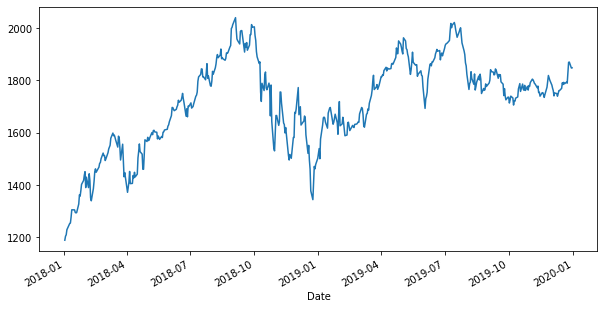

In [4]:
df_AMZN['Adj Close'].plot(figsize=(10, 5))

## 日経平均株価の取得
日経平均の ticker symbol は '^N225' である。

In [5]:
# 日経平均株価の取得 (2019.08.01〜2020.08.01)
# (メモ) Yahoo! Finance は panda-datareader の data source から depriated されていたが，
# 再び使えるようになっている （再び利用不可となる可能性はある)
from pandas_datareader import data
from datetime import datetime

# '^N225' : ティッカー・シンボル
# 'yahoo' : データソースの指定 (Yahoo! finance)
start = datetime(2019, 8, 1)
end = datetime(2020, 8, 1)
df = data.DataReader('^N225', 'yahoo', start, end)

In [6]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-01,21556.689453,21288.900391,21361.580078,21540.990234,75700,21540.990234
2019-08-02,21211.060547,20960.089844,21211.060547,21087.160156,91500,21087.160156
2019-08-05,20941.830078,20514.189453,20909.980469,20720.289062,85800,20720.289062
2019-08-06,20607.830078,20110.759766,20325.519531,20585.310547,89700,20585.310547
2019-08-07,20570.189453,20406.519531,20548.070312,20516.560547,73600,20516.560547
...,...,...,...,...,...,...
2020-07-27,22741.130859,22429.570312,22495.949219,22715.849609,71800,22715.849609
2020-07-28,22842.189453,22646.220703,22735.019531,22657.380859,67800,22657.380859
2020-07-29,22584.869141,22366.339844,22543.890625,22397.109375,74300,22397.109375


Text(0, 0.5, 'Close')

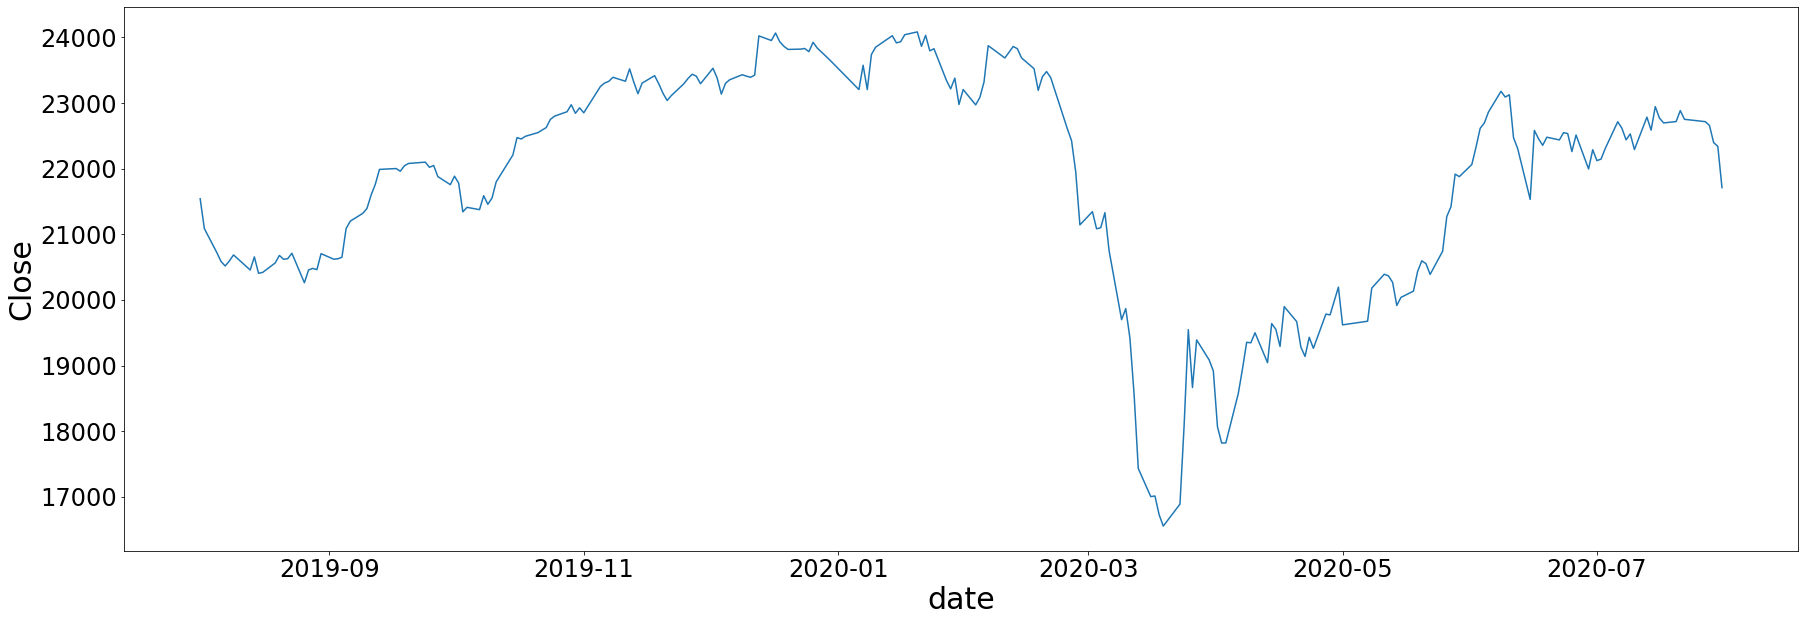

In [7]:
# 終値を取り出す
# (メモ) 本来は Adj Close を使うべきだが，後々のコードの一貫性のため，あえて Close を利用

date = df.index # 'Date' の列（pandas では index と呼ぶ）を取り出す
price = df['Close']

import matplotlib.pyplot as plt
plt.figure(figsize=(30, 10))
plt.plot(date, price, label='Nikkei225')
plt.xticks(fontsize=24) # x軸ラベルのフォントサイズを大きめに設定
plt.yticks(fontsize=24) # y軸ラベルのフォントサイズを大きめに設定
plt.xlabel('date', size=30)
plt.ylabel('Close', size=30)

### 移動平均を求め，株式売り買いのタイミングを見定める
株価が上昇するタイミング，下降するタイミングを見極める

In [8]:
# 単純移動平均 (SMA : Simple Moving Average)
span5 = 5 # 短期(過去5日間)の移動平均
span25 = 25 # 中期(過去25日間)の移動平均
df['sma5'] = price.rolling(window=span5).mean()
df['sma25'] = price.rolling(window=span25).mean()

# 荷重移動平均

# 指数平滑移動平均

In [9]:
df.head(15)

,High,Low,Open,Close,Volume,Adj Close,sma5,sma25
Date,,,,,,,,
2019-08-01,21556.689453,21288.900391,21361.580078,21540.990234,75700,21540.990234,NaN,NaN
2019-08-02,21211.060547,20960.089844,21211.060547,21087.160156,91500,21087.160156,NaN,NaN
2019-08-05,20941.830078,20514.189453,20909.980469,20720.289062,85800,20720.289062,NaN,NaN
2019-08-06,20607.830078,20110.759766,20325.519531,20585.310547,89700,20585.310547,NaN,NaN
2019-08-07,20570.189453,20406.519531,20548.070312,20516.560547,73600,20516.560547,20890.062109,NaN
2019-08-08,20682.240234,20462.980469,20529.289062,20593.349609,64800,20593.349609,20700.533984,NaN
2019-08-09,20782.060547,20676.919922,20758.150391,20684.820312,63700,20684.820312,20620.066016,NaN
2019-08-13,20503.380859,20369.269531,20432.679688,20455.439453,72900,20455.439453,20567.096094,NaN
2019-08-14,20697.419922,20581.169922,20669.990234,20655.130859,60900,20655.130859,20581.060156,NaN


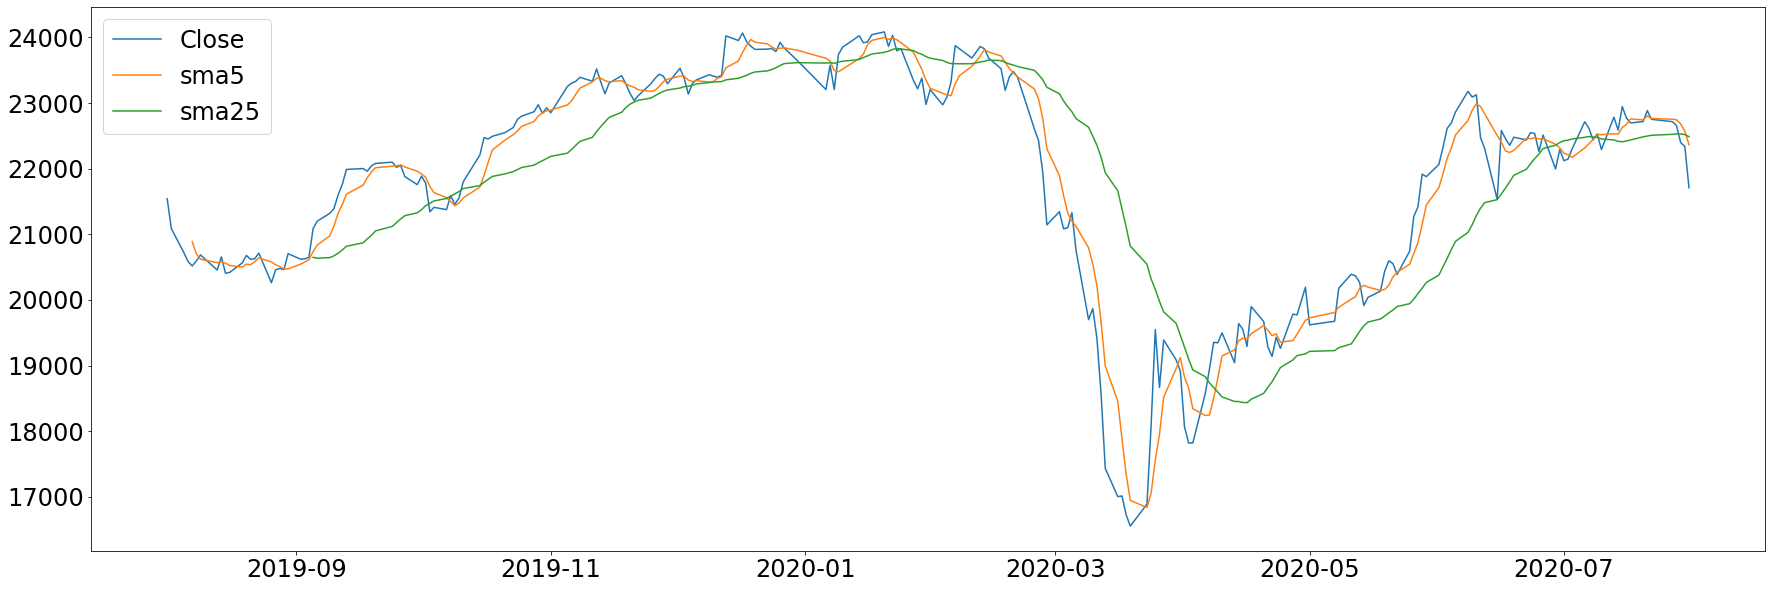

In [10]:
plt.figure(figsize=(30, 10))
plt.plot(date, price, label='Close')
plt.plot(date, df['sma5'], label='sma5')
plt.plot(date, df['sma25'], label='sma25')
plt.xticks(fontsize=24) # x軸ラベルのフォントサイズを大きめに設定
plt.yticks(fontsize=24) # y軸ラベルのフォントサイズを大きめに設定
plt.legend(fontsize=24)

### 用語の説明
- ゴールデンクロス: 短期の移動平均線が中期以上の移動平均線を下から上へ抜けること → 株価の上昇を示すサインとなっている
- デッドクロス: 短期の移動平均線が中期以上の移動平均線を上から下へ抜けること → 株価の下降を示すサインとなっている

### 以上のコードをまとめる

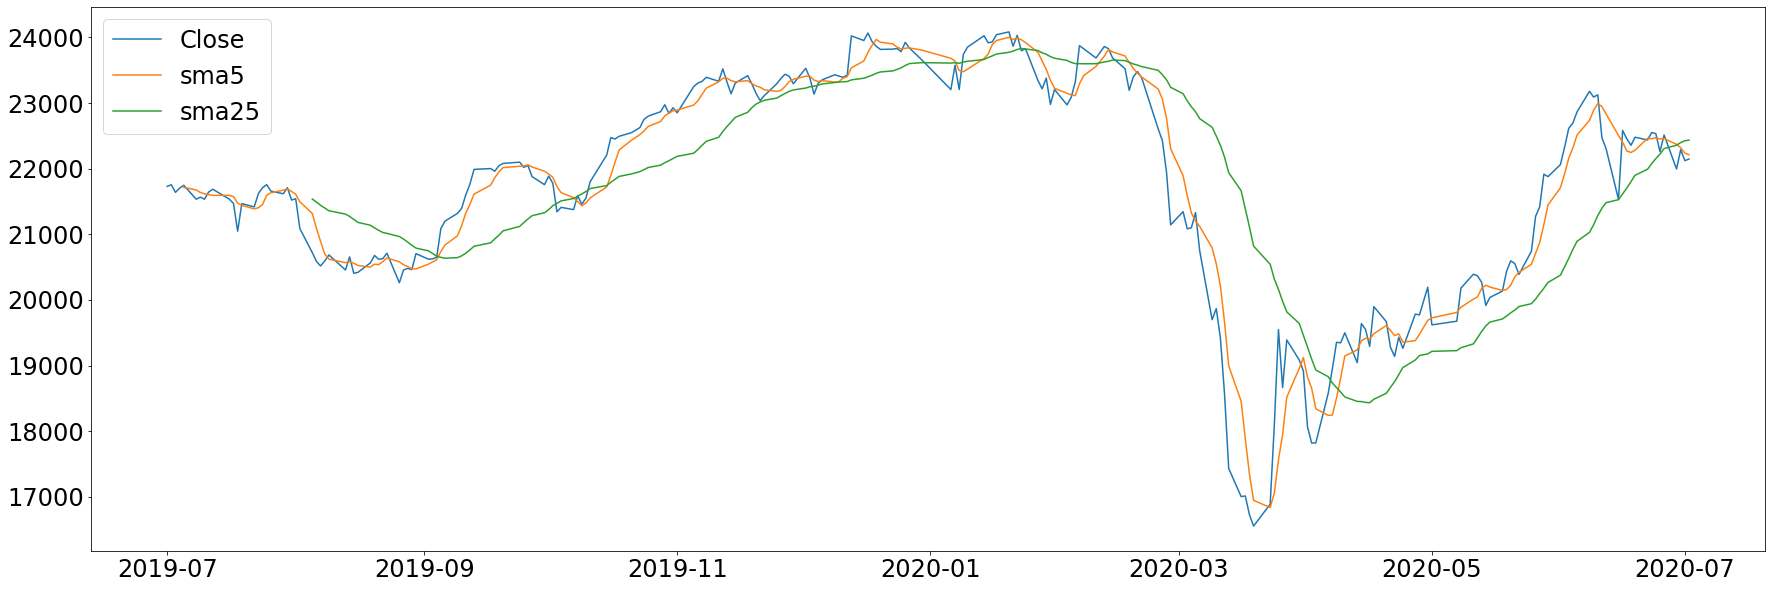

In [11]:
# 日経平均株価の取得 (2019.06.01〜2020.06.01)
# '^N225' : ティッカー・シンボル
# 'yahoo' : データソースの指定 (Yahoo! finance)
# (メモ) Yahoo! Finance は panda-datareader の data source から depriated されていたが，
# 再び使えるようになっている （再び利用不可となる可能性はある)
from pandas_datareader import data
from datetime import datetime

# '^N225' : ティッカー・シンボル
# 'yahoo' : データソースの指定 (Yahoo! finance)

def stock_plot(df):
    # 終値を取り出す
    date = df.index # 'Date' の列（pandas では index と呼ぶ）を取り出す
    price = df['Close']

    # 単純移動平均 (SMA : Simple Moving Average)
    span5 = 5 # 短期(過去5日間)の移動平均
    span25 = 25 # 中期(過去25日間)の移動平均
    df['sma5'] = price.rolling(window=span5).mean()
    df['sma25'] = price.rolling(window=span25).mean()

    plt.figure(figsize=(30, 10))
    plt.plot(date, price, label='Close')
    plt.plot(date, df['sma5'], label='sma5')
    plt.plot(date, df['sma25'], label='sma25')
    plt.xticks(fontsize=24) # x軸ラベルのフォントサイズを大きめに設定
    plt.yticks(fontsize=24) # y軸ラベルのフォントサイズを大きめに設定
    plt.legend(fontsize=24)

start=datetime(2019, 7, 1)
end=datetime(2020, 7, 1)
df = data.DataReader('^N225', 'yahoo', start, end)

stock_plot(df)

## 他の市場も眺めてみよう
日本の株式市場は日経平均がメジャだが，
アメリカには（昔ながらの）ダウ平均や S&P500，また新興企業（ベンチャー企業）が集まるナスダックがある。
それぞれの株式市場の ticker symbol は下表のとおりである。

株式市場 | ticker symbol
---- | ----
日経平均 | '^N225'
ダウ平均 | '^DJI'
S&P500 | '^GSPC'
ナスダック | '^NDX'

アメリカの市場も新型コロナウイルスの影響から復活しているだろうか？

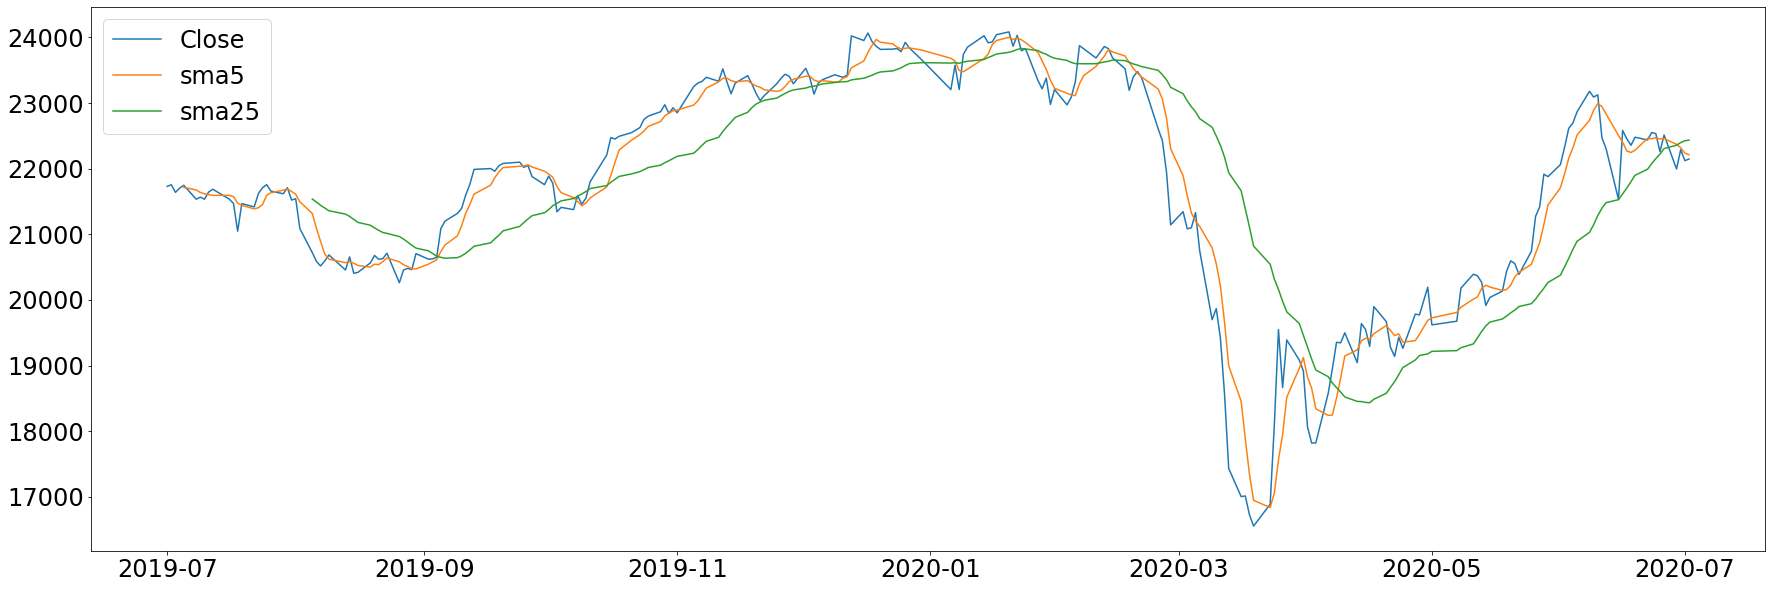

In [12]:
start=datetime(2019, 7, 1)
end=datetime(2020, 7, 1)
df = data.DataReader('^N225', 'yahoo', start, end)

stock_plot(df)

## 自分が注目する「日本の」企業の株価を調べてみよう
Yahoo! Finance では米国株しか得られない（日経平均は特別扱い）ため，
日本株のデータを得たい場合はデータソースとして Stooq を利用する。

(メモ) Stooq はポーランドのサイトらしい。データ提供，ありがとう！

また，予め日本証券取引所等を利用し，コードを取得する必要がある。

日本証券取引所のサイト
https://www.jpx.co.jp/

(例) 明治ホールディングス → コードは 22690 → ticker symbol は'2269.JP'


In [13]:
start=datetime(2019, 7, 1)
end=datetime(2020, 7, 1)
df = data.DataReader('2269.JP', 'stooq', start, end) # 明治ホールディングス

# Stooq のデータは「新→古」の順番となっている。
# そこで，データを古い日付から新しい日付に並べ直す (index の並び替え)
df = df.sort_index()

In [14]:
df.head() # データの先頭を眺める

,Open,High,Low,Close,Volume
Date,,,,,
2015-08-27,8867.91,9183.60,8830.21,9046.95,969236
2015-08-28,9235.44,9282.56,9023.39,9268.42,931036
2015-08-31,9282.56,9353.24,9127.05,9306.09,727935
2015-09-01,9188.30,9202.45,8731.25,8731.25,1070043
2015-09-02,8448.55,8853.76,8340.16,8613.47,1025050


In [15]:
df.tail() # データの末尾を眺める

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-18,8500.0,8560.0,8460.0,8550.0,318900
2020-08-19,8580.0,8660.0,8570.0,8620.0,301800
2020-08-20,8600.0,8700.0,8590.0,8680.0,253300
2020-08-21,8720.0,8750.0,8610.0,8640.0,206800
2020-08-24,8640.0,8720.0,8630.0,8680.0,205500


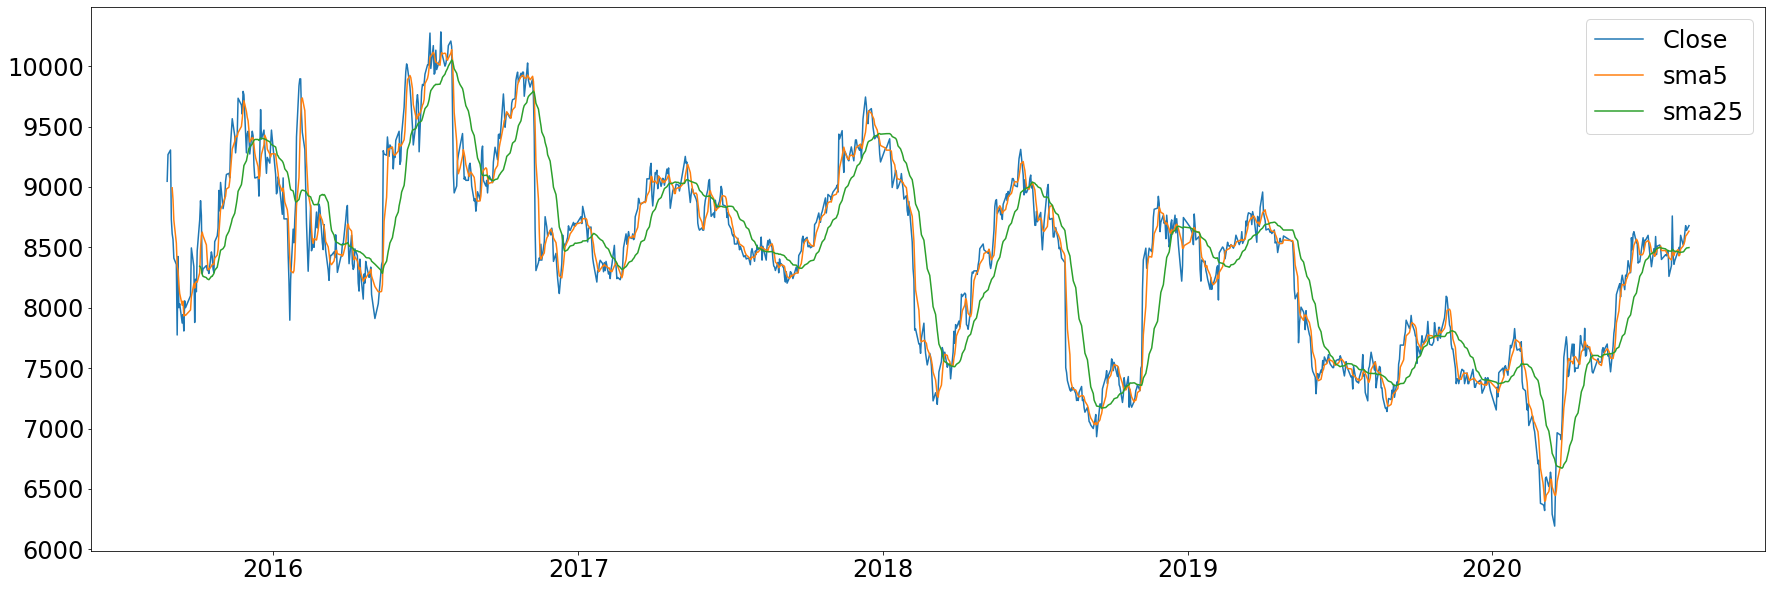

In [16]:
# 可視化
stock_plot(df)

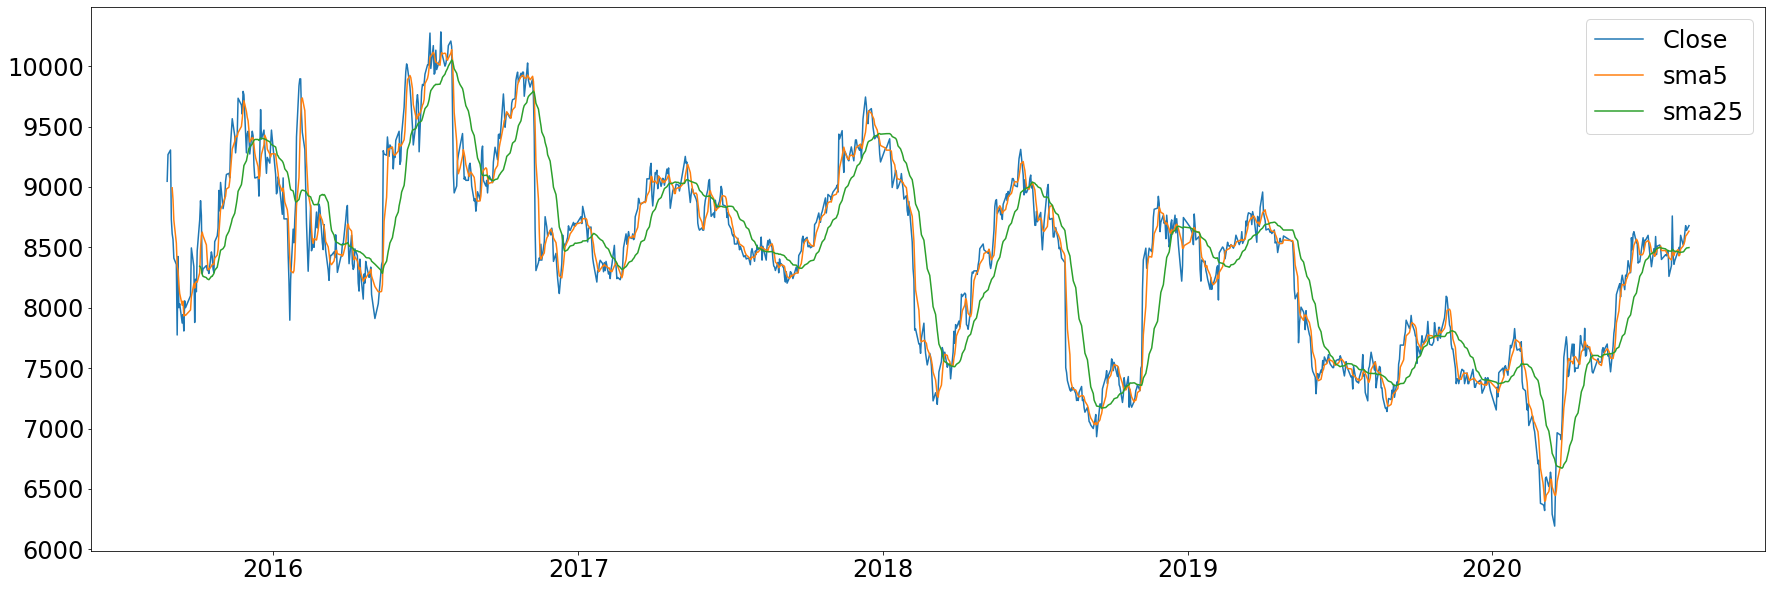

In [17]:
# 以上をまとめると

start=datetime(2019, 7, 1)
end=datetime(2020, 7, 1)
df = data.DataReader('2269.JP', 'stooq', start, end)

# Stooq のデータは「新→古」の順番となっている。
# そこで，データを古い日付から新しい日付に並べ直す (index の並び替え)
df = df.sort_index()

# 可視化
stock_plot(df)

# ここから新しい話題！

## 月毎のリターンを平均して可視化する
夏場は株価が上がりにくい，という定説がある。6〜9月の株価を検証してみよう。→ 株価のパフォーマンスを評価する
ただし，日経平均やダウ平均等，複数の企業を束ねた平均株価にて観測される。

ターゲット：日経平均，NYダウ，（米国個別株）

（参考）Pythonで株価分析を自動化！月ごとの株価変動の平均値を計算して、グラフ化する方法 on YouTube

日経: ^N225
ダウ: ^DJI
ナスダック: ^NDX
S&P500: ^GSPC

In [18]:
# 10年分の日経平均株価を取得
start=datetime(2010, 1, 1)
end=datetime(2019, 12, 31)
df = data.DataReader('^N225', 'yahoo', start, end)

In [19]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,10694.490234,10608.139648,10609.339844,10654.790039,104400.0,10654.790039
2010-01-05,10791.040039,10655.570312,10719.440430,10681.830078,166200.0,10681.830078
2010-01-06,10768.610352,10661.169922,10709.549805,10731.450195,181800.0,10731.450195
2010-01-07,10774.000000,10636.669922,10742.750000,10681.660156,182600.0,10681.660156
2010-01-08,10816.450195,10677.559570,10743.299805,10798.320312,211800.0,10798.320312
...,...,...,...,...,...,...
2019-12-24,23853.560547,23796.349609,23839.179688,23830.580078,37900.0,23830.580078
2019-12-25,23824.849609,23782.869141,23813.589844,23782.869141,31600.0,23782.869141
2019-12-26,23931.509766,23775.400391,23787.699219,23924.919922,40300.0,23924.919922


In [20]:
# 月始・月末の株価を取り出す ・・・これ，説明が難しい
stock_begin = df.resample('M').first() # 月始の株価 (月始・・「げっしょ」と読む)
stock_end = df.resample('M').last() # 月末の株価

In [21]:
stock_begin.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-31,10694.490234,10608.139648,10609.339844,10654.790039,104400.0,10654.790039
2010-02-28,10224.830078,10129.910156,10212.360352,10205.019531,161900.0,10205.019531
2010-03-31,10215.150391,10116.860352,10128.730469,10172.059570,108400.0,10172.059570
2010-04-30,11272.730469,11118.179688,11178.919922,11244.400391,166500.0,11244.400391
2010-05-31,10847.900391,10682.610352,10847.900391,10695.690430,183800.0,10695.690430


In [22]:
stock_end.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-31,10324.370117,10198.040039,10308.049805,10198.040039,156800.0,10198.040039
2010-02-28,10171.219727,10085.129883,10107.080078,10126.030273,113200.0,10126.030273
2010-03-31,11147.620117,11085.549805,11138.719727,11089.940430,141700.0,11089.940430
2010-04-30,11092.519531,11035.269531,11062.120117,11057.400391,156700.0,11057.400391
2010-05-31,9831.730469,9728.419922,9735.469727,9768.700195,121400.0,9768.700195


In [23]:
# 月あたりの株価の変動幅・変動率を求める
stock_end['Month Open'] = stock_begin['Open']
stock_end['Month Change'] = stock_end['Close'] - stock_begin['Open'] # 変動幅
stock_end['Month Rate'] = (stock_end['Close'] - stock_begin['Open']) / stock_begin['Open'] * 100 # 変動率

In [24]:
stock_end.head()

,High,Low,Open,Close,Volume,Adj Close,Month Open,Month Change,Month Rate
Date,,,,,,,,,
2010-01-31,10324.370117,10198.040039,10308.049805,10198.040039,156800.0,10198.040039,10609.339844,-411.299805,-3.876771
2010-02-28,10171.219727,10085.129883,10107.080078,10126.030273,113200.0,10126.030273,10212.360352,-86.330078,-0.845349
2010-03-31,11147.620117,11085.549805,11138.719727,11089.940430,141700.0,11089.940430,10128.730469,961.209961,9.489935
2010-04-30,11092.519531,11035.269531,11062.120117,11057.400391,156700.0,11057.400391,11178.919922,-121.519531,-1.087042
2010-05-31,9831.730469,9728.419922,9735.469727,9768.700195,121400.0,9768.700195,10847.900391,-1079.200195,-9.948471


In [25]:
# 月単位のグルーピングのため，年，月をばらしてインデックスとする
stock_end = stock_end.set_index([stock_end.index.year, stock_end.index.month])
stock_end.index.names = ['year', 'month']

In [26]:
stock_end

High           Low  ...  Month Change  Month Rate
year month                              ...                          
2010 1      10324.370117  10198.040039  ...   -411.299805   -3.876771
     2      10171.219727  10085.129883  ...    -86.330078   -0.845349
     3      11147.620117  11085.549805  ...    961.209961    9.489935
     4      11092.519531  11035.269531  ...   -121.519531   -1.087042
     5       9831.730469   9728.419922  ...  -1079.200195   -9.948471
...                  ...           ...  ...           ...         ...
2019 8      20748.349609  20633.300781  ...   -657.210938   -3.076603
     9      21811.980469  21666.599609  ...   1130.089844    5.479024
     10     22988.800781  22875.500000  ...   1095.599609    5.018449
     11     23498.769531  23273.369141  ...    563.419922    2.478697
     12     23782.490234  23656.619141  ...    267.988281    1.145806

[120 rows x 9 columns]

In [27]:
# 各月の変動幅／変動率の平均を求める・・・説明が大変だから，こういうもんだ，と思ってください
# aggregate() は一度に複数の処理を施すためのメソッド
# (メモ) aggregate() は別名 agg() でも利用できる
import numpy as np
df_month_performance = stock_end.groupby('month').aggregate({'Month Change':np.mean, 'Month Rate':np.mean})

In [28]:
df_month_performance

,Month Change,Month Rate
month,,
1,-103.744043,-0.505450
2,76.932324,1.313119
3,148.093066,1.472478
4,258.286035,1.291599
5,-145.876660,-1.580201
6,53.275098,0.458170
7,145.825781,0.754760
8,-372.986035,-2.612740
9,323.229590,1.958707


Text(0, 0.5, 'rate')

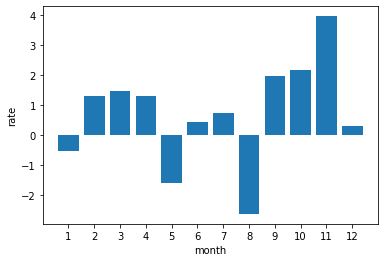

In [29]:
# 可視化
plt.bar(df_month_performance.index, df_month_performance['Month Rate'])
plt.xticks(list(range(1, 13)))  # plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12]) と同じ
plt.xlabel('month')
plt.ylabel('rate')

### 以上のコードをまとめる

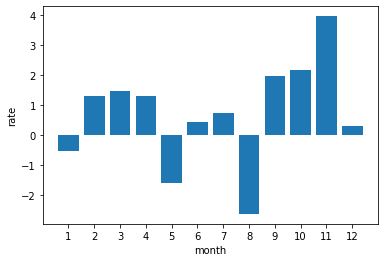

In [30]:
from pandas_datareader import data
from datetime import datetime
import matplotlib.pyplot as plt

def stock_performance(df):
    # 月始・月末の株価を取り出す
    stock_begin = df.resample('M').first() # 月始の株価 (月始・・「げっしょ」と読む)
    stock_end = df.resample('M').last() # 月末の株価

    # 月あたりの株価の変動幅・変動率を求める
    stock_end['Month Open'] = stock_begin['Open']
    stock_end['Month Change'] = stock_end['Close'] - stock_begin['Open'] # 変動幅
    stock_end['Month Rate'] = (stock_end['Close'] - stock_begin['Open']) / stock_begin['Open'] * 100 # 変動率

    # 月単位のグルーピングのため，年，月をばらしてインデックスとする
    stock_end = stock_end.set_index([stock_end.index.year, stock_end.index.month])
    stock_end.index.names = ['year', 'month']

    # 各月の変動幅／変動率の平均を求める・・・説明が大変だから，こういうもんだ，と思ってください
    # aggregate() は一度に複数の処理を施すためのメソッド
    # (メモ) aggregate() は別名 agg() でも利用できる
    import numpy as np
    df_month_performance = stock_end.groupby('month').aggregate({'Month Change':np.mean, 'Month Rate':np.mean})

    # 可視化
    plt.bar(df_month_performance.index, df_month_performance['Month Rate'])
    plt.xticks(list(range(1, 13))) # plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12]) と同じ
    plt.xlabel('month')
    plt.ylabel('rate')

start=datetime(2010, 1, 1)
end=datetime(2019, 12, 31)
df = data.DataReader('^N225', 'yahoo', start, end)
stock_performance(df)

### GAFA を対象に株価のパフォーマンスを見てみよう
GAFA (Google, Apple, Facebook, Amazon) の ticker symbol は下表のとおり：

企業名 | ticker symbol
---- | ----
Google | 'GOOGL'
Apple | 'AAPL'
Facebook | 'FB'
Amazon | 'AMZN'

以下は Amzon の例である。他の企業ではどうだろうか？

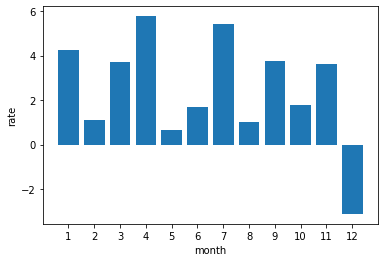

In [31]:
start=datetime(2010, 1, 1)
end=datetime(2019, 12, 31)
df = data.DataReader('AMZN', 'yahoo', start, end)
stock_performance(df)